# Import required libraries

In [1]:
import pandas as pd
from datetime import datetime

# Read and Cleaning Code from Python Block 6

In [2]:
store = pd.read_csv('Store 7141 Raw Data (clean).csv') #reads in .csv
store['DateTime'] = pd.to_datetime(store['DateTime']) #conversion of 'DateTime' column to datetime64
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December'] #create order of months
store['Month'] = pd.Categorical(store['Month'], categories=month_order, ordered=True) #conversion of 'Month' column to categorical
shift_order = ['Morning', 'Lunch', 'Mid-Day', 'Dinner', 'Evening'] #create order of shifts
store['Shift'] = pd.Categorical(store['Shift'], categories=shift_order, ordered=True) #conversion of 'Shift' column to categorical
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50847 entries, 0 to 50846
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Trans_id      50847 non-null  object        
 1   Menu_id       50847 non-null  int64         
 2   Sand_id       50847 non-null  int64         
 3   Employees     50847 non-null  int64         
 4   Bread_CT      50847 non-null  int64         
 5   Cheese_CT     50847 non-null  int64         
 6   Protein_CT    50847 non-null  int64         
 7   Produce_CT    50847 non-null  int64         
 8   Wrap_CT       50847 non-null  int64         
 9   Payment_CT    50847 non-null  int64         
 10  Cycle         50847 non-null  int64         
 11  Labor_Cost    50847 non-null  object        
 12  Bread_Cost    50847 non-null  object        
 13  Cheese_Cost   50847 non-null  object        
 14  Protein_Cost  50847 non-null  object        
 15  Produce_Cost  50847 non-null  object

# Basic Visualization Tools

In [4]:
#designate the process columns
processes = ['Bread_CT', 'Cheese_CT', 'Protein_CT', 'Produce_CT', 'Wrap_CT', 'Payment_CT', 'Cycle']

#initialize pivot table
pivot1 = store.pivot_table(values=processes, index='Sand', aggfunc='mean').round(1)

#running this step will set the order based on processes
#notice this is different from the way we did it above. Why?
pivot1 = pivot1[processes]

#running this sorts by Cycle and drops it immediately
pivot1 = pivot1.sort_values('Cycle', ascending = False)
pivot1 = pivot1.drop(columns = 'Cycle')

pivot1

,Bread_CT,Cheese_CT,Protein_CT,Produce_CT,Wrap_CT,Payment_CT
Sand,,,,,,
Meatball,134.2,34.3,23.7,46.2,15.9,108.9
BLT,67.3,34.4,13.6,64.5,15.9,108.4
Italian,67.3,41.2,11.9,51.8,15.9,108.2
Cold Cut,67.0,34.2,11.7,51.8,15.9,107.8
Pastrami,67.4,24.0,20.6,52.0,15.8,108.4
Steak,67.1,34.4,17.7,41.4,15.9,108.8
Chicken,67.3,27.4,8.2,51.7,15.9,109.4


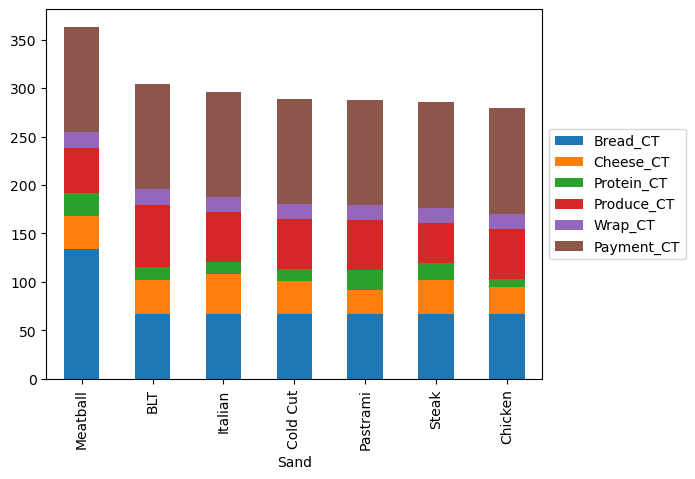

In [5]:
fig1 = pivot1.plot(kind='bar',stacked=True)
fig1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#what's wrong with this chart
#why should remove 'Cycle' from chart?

# Editing Plot Features with Pandas

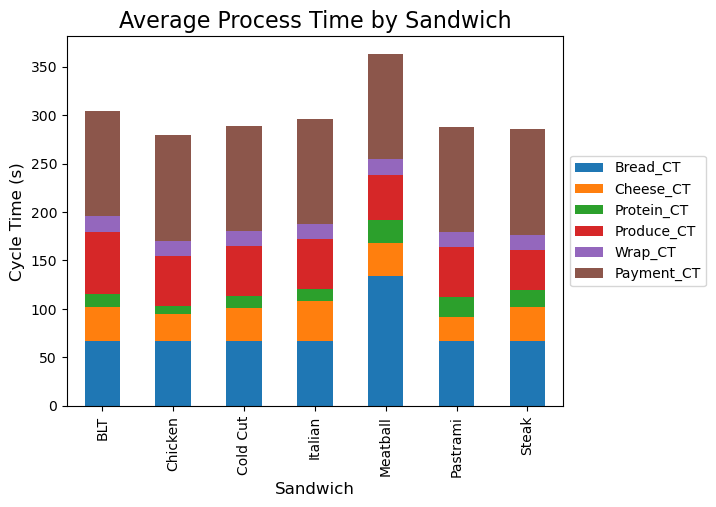

In [6]:
#must copy and paste the creation of the "plot" again
#making edits in a new cell block will simply change the "instances" of the "figure" but will not display image
fig1 = pivot1.plot(kind='bar',stacked=True)
fig1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#how to add a title
fig1.set_title('Average Process Time by Sandwich', size=16)

#how to remove x-axis title
fig1.set_xlabel('')

#alternative if you want to show the axis titles
fig1.set_xlabel('Sandwich', size=12)
fig1.set_ylabel('Cycle Time (s)', size=12)

#you can use this to hide the last output
print()

# Seaborne and Matplotlib Visualization Libraries

In [7]:
#this is an extensive visualization library that we will only touch the surface on
import seaborn as sns

#while this package provides varying visuals, we mostly use the plot editing features from this
#take note most of the basic tools are now, already a part of Pandas
import matplotlib.pyplot as plt

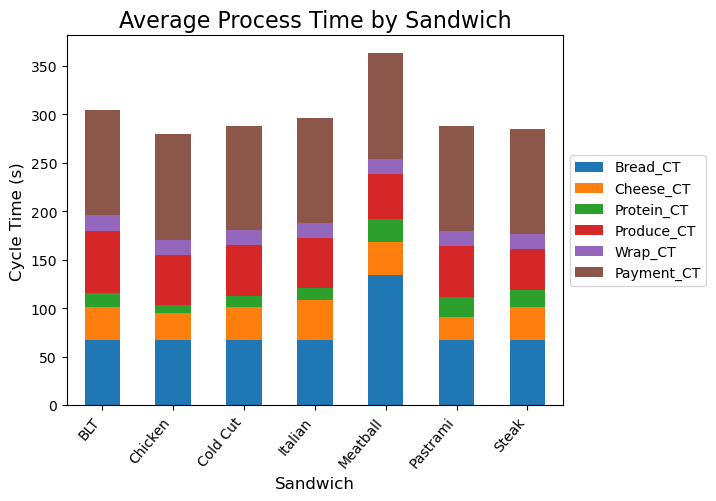

In [22]:
fig2 = pivot1.plot(kind='bar',stacked=True)

#when you edit with matplotlib, you now just call the commands to the 'current' object rather than having to continuously call the object
plt.title('Average Process Time by Sandwich', size=16)
plt.xlabel('Sandwich', size=12)
plt.ylabel('Cycle Time (s)', size=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5,))

#you get additional features available for cleaning with matplotlib
#"ha" stands for horizontal alignment (we are aligning it on the right side)
#show difference if we omit "ha", notice words match tick marks
plt.xticks(rotation = 50,ha = 'right')

#again, to clear the last output
print()

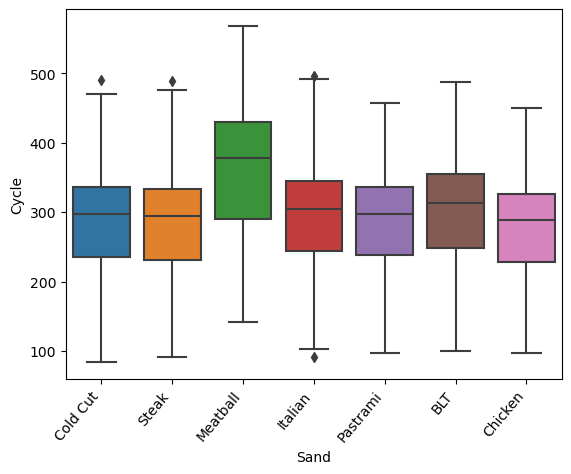

In [20]:
#another way we can display this data is using the seaborn feature for boxplot
#notice that we are actually "using" the data points rather than averages
#additionally, notice it is pre-formatted
sns.boxplot(data = store, x = 'Sand', y = 'Cycle')

plt.xticks(rotation = 50, ha = 'right')

print()

<Axes: xlabel='Sand', ylabel='Wait'>

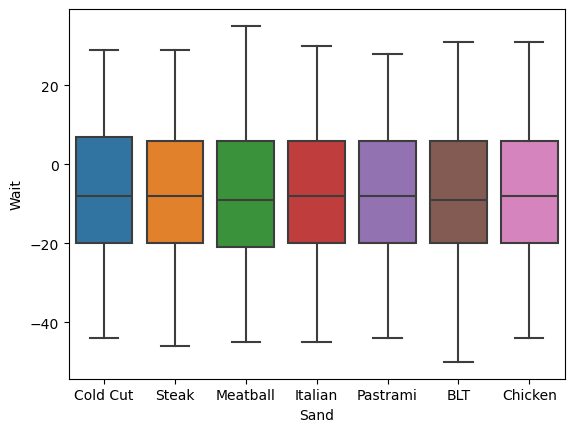

In [24]:
#now lets see if that difference actually affects our Wait Rating
sns.boxplot(data = store, x = 'Sand', y = 'Wait')

<Axes: xlabel='Bread_CT', ylabel='Wait'>

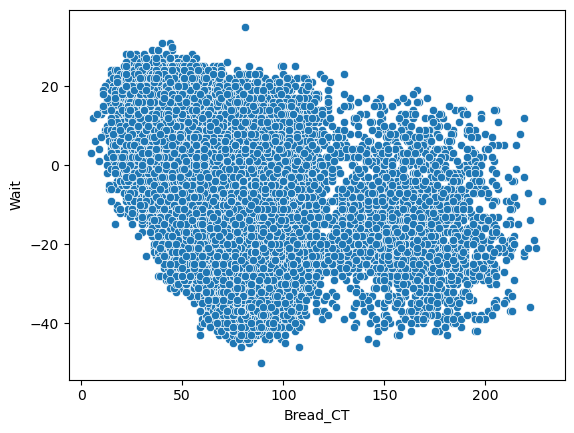

In [29]:
sns.scatterplot(data = store, x = 'Bread_CT', y = 'Wait')

<Axes: xlabel='Bread_CT', ylabel='Wait'>

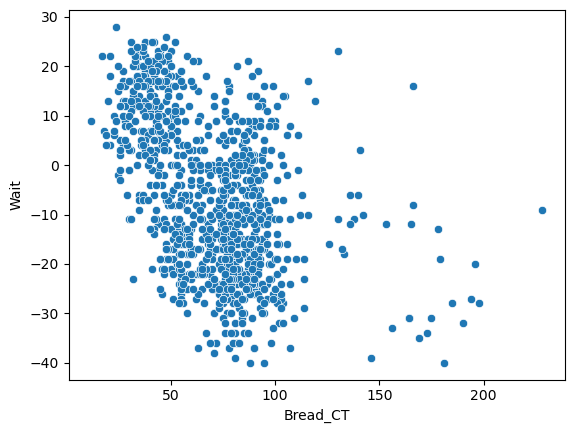

In [30]:
#take note that using all the data points becomes very busy
#we can still model the same trends using less data for visual purposes
sns.scatterplot(data = store.sample(1000), x = 'Bread_CT', y = 'Wait')

<Axes: xlabel='Payment_CT', ylabel='Wait'>

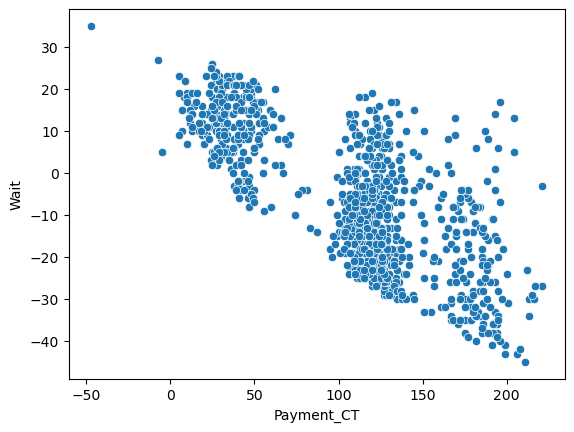

In [31]:
sns.scatterplot(data = store.sample(1000), x = 'Payment_CT', y = 'Wait', hue = 'Shift')

# Plotting Multiple Figures Together

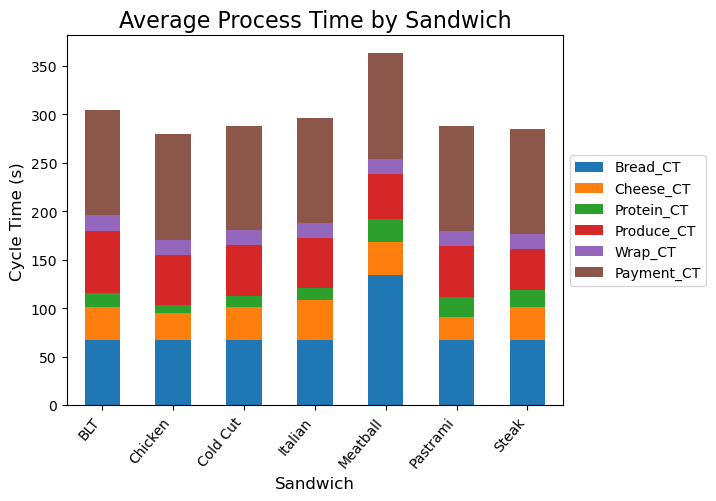

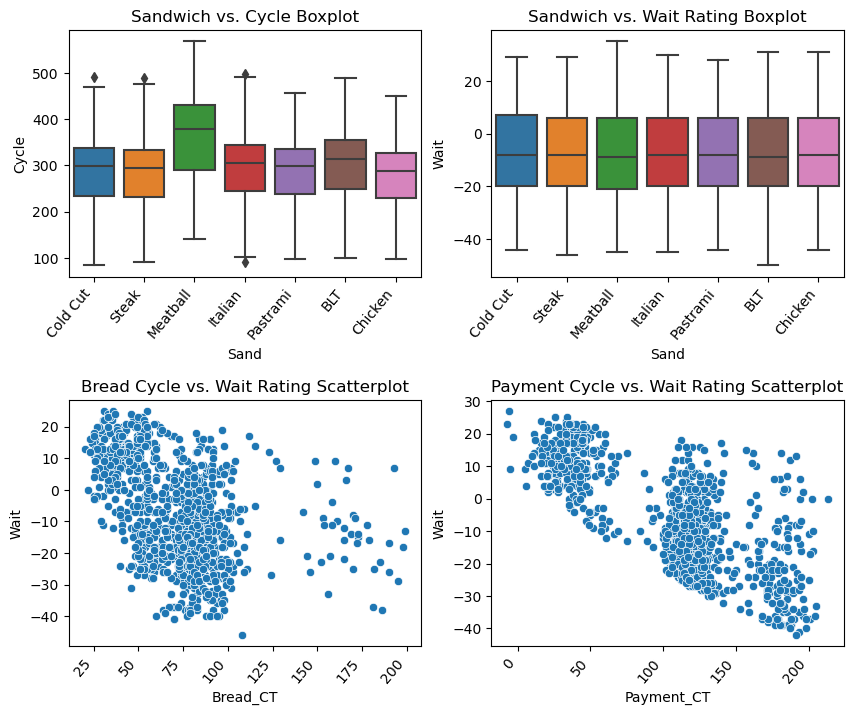

In [66]:
pivot1.plot(kind='bar',stacked=True)
plt.title('Average Process Time by Sandwich', size=16)
plt.xlabel('Sandwich', size=12)
plt.ylabel('Cycle Time (s)', size=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5,))
plt.xticks(rotation = 50, ha = 'right')

#using subplot follows the format subplot(nrows, ncols, index)
#trying to put two different library graphics together requires a lot of additional work
#the formatting is different for different libraries, but it is possible
#we will not go over it in this class
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
sns.boxplot(data = store, x = 'Sand', y = 'Cycle')
plt.title('Sandwich vs. Cycle Boxplot')
plt.xticks(rotation = 50, ha = 'right')

plt.subplot(2,2,2)
sns.boxplot(data = store, x = 'Sand', y = 'Wait')
plt.title('Sandwich vs. Wait Rating Boxplot')
plt.xticks(rotation = 50, ha = 'right')

plt.subplot(2,2,3)
sns.scatterplot(data = store.sample(1000), x = 'Bread_CT', y = 'Wait')
plt.title('Bread Cycle vs. Wait Rating Scatterplot')
plt.xticks(rotation = 50, ha = 'right')

plt.subplot(2,2,4)
sns.scatterplot(data = store.sample(1000), x = 'Payment_CT', y = 'Wait')
plt.title('Payment Cycle vs. Wait Rating Scatterplot')
plt.xticks(rotation = 50, ha = 'right')

plt.subplots_adjust(hspace=0.5)

plt.savefig('Quad Chart.png')

# Python Exercise 6 - Exploratory Data Analysis

### 1. Conduct a similar analysis on the various shifts and their cycle times. Which shift(s) and what process(es) are affecting the cycle times the most?

In [73]:
#recreate the pivot table
pivot2 = store.pivot_table(values=processes, index='Shift', aggfunc='mean').round(1)
pivot2

,Bread_CT,Cheese_CT,Payment_CT,Produce_CT,Protein_CT,Wrap_CT
Shift,,,,,,
Morning,44.4,35.0,41.0,51.8,13.9,18.3
Lunch,42.2,33.7,35.4,50.5,14.0,16.3
Mid-Day,44.2,34.7,37.8,50.2,14.2,17.5
Dinner,82.3,32.5,134.2,50.7,14.1,15.5
Evening,44.0,35.1,40.5,50.5,14.1,18.6


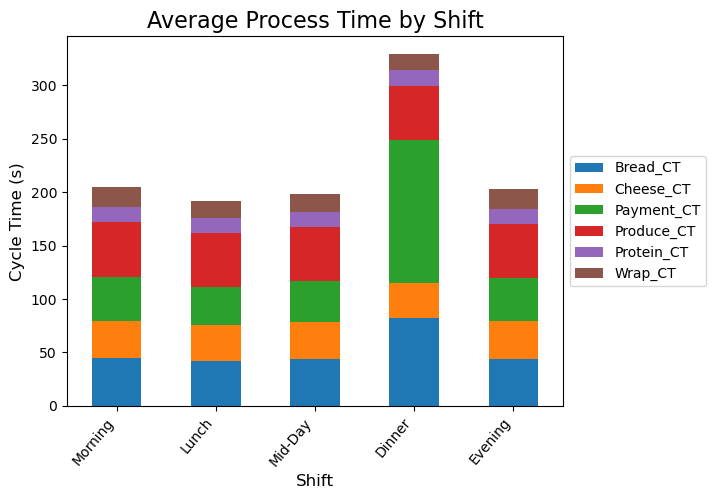

In [75]:
#simply copy and paste the previous code and replace Sand with Shift

pivot2.plot(kind='bar',stacked=True)
plt.title('Average Process Time by Shift', size=16)
plt.xlabel('Shift', size=12)
plt.ylabel('Cycle Time (s)', size=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5,))
plt.xticks(rotation = 50, ha = 'right')

print()

### 2. Investigate if a particular shift or process has an observed relationship with our Wait Rating. Arrange four appropriate graphics in a 2x2 fashion to depict your findings.

C:\Users\1187483510E\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\1187483510E\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


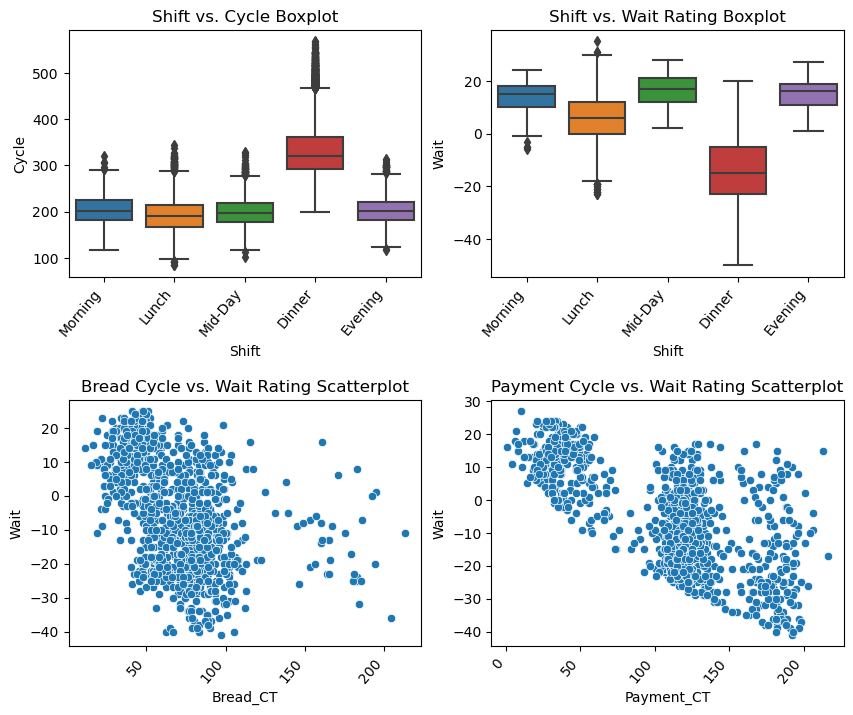

In [76]:
#using subplot follows the format subplot(nrows, ncols, index)
#trying to put two different library graphics together requires a lot of additional work
#the formatting is different for different libraries, but it is possible
#we will not go over it in this class
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
sns.boxplot(data = store, x = 'Shift', y = 'Cycle')
plt.title('Shift vs. Cycle Boxplot')
plt.xticks(rotation = 50, ha = 'right')

plt.subplot(2,2,2)
sns.boxplot(data = store, x = 'Shift', y = 'Wait')
plt.title('Shift vs. Wait Rating Boxplot')
plt.xticks(rotation = 50, ha = 'right')

plt.subplot(2,2,3)
sns.scatterplot(data = store.sample(1000), x = 'Bread_CT', y = 'Wait')
plt.title('Bread Cycle vs. Wait Rating Scatterplot')
plt.xticks(rotation = 50, ha = 'right')

plt.subplot(2,2,4)
sns.scatterplot(data = store.sample(1000), x = 'Payment_CT', y = 'Wait')
plt.title('Payment Cycle vs. Wait Rating Scatterplot')
plt.xticks(rotation = 50, ha = 'right')

plt.subplots_adjust(hspace=0.5)

## Deprecated Graphics

<Figure size 640x480 with 0 Axes>

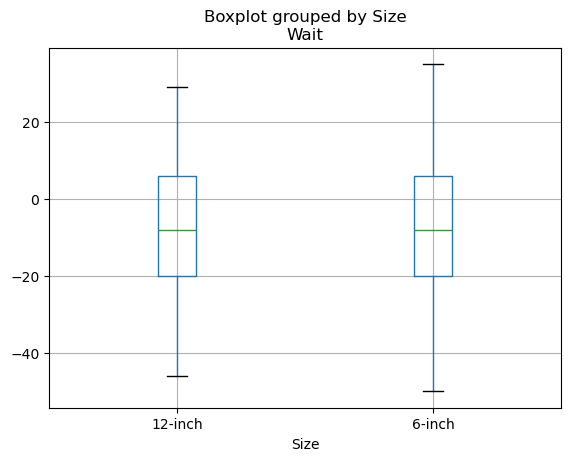

<Figure size 640x480 with 0 Axes>

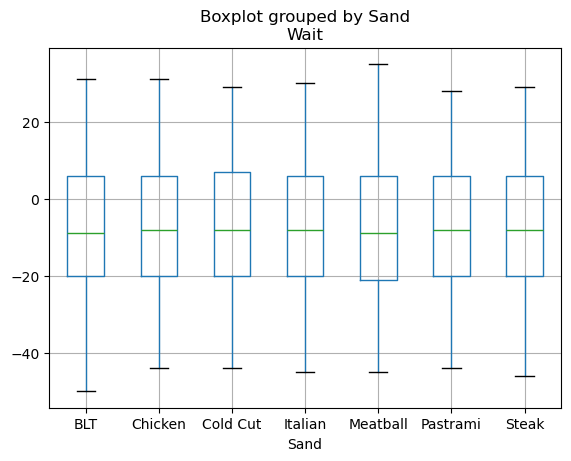

<Figure size 640x480 with 0 Axes>

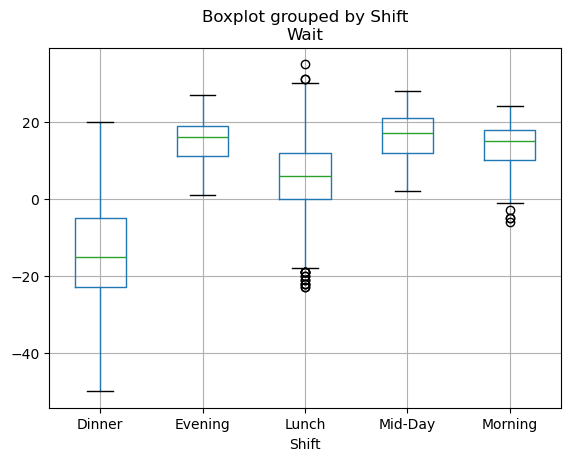

In [60]:
#ask to try out several different ones (by shift, by sandwich, by size)
tests = ['Size','Sand','Shift']
for i in tests:
    plt.figure(i)
    store.boxplot(column='Wait',by=i)

<Axes: title={'center': 'Scatter Plot of Cycle vs Wait'}, xlabel='Cycle', ylabel='Wait'>

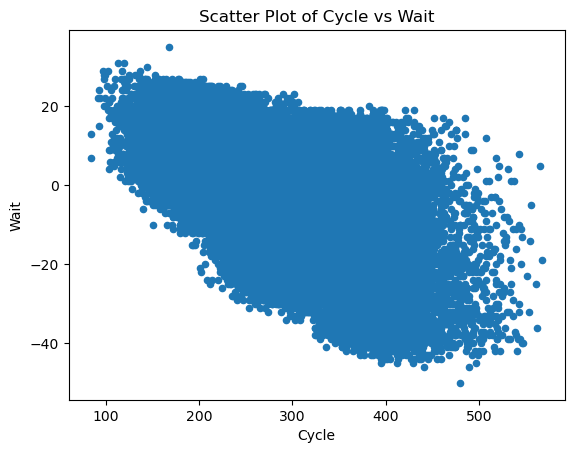

In [24]:
x_col = 'Cycle'
y_col = 'Wait'
store.plot.scatter(x=x_col,y=y_col, title=f'Scatter Plot of {x_col} vs {y_col}')

#whats wrong with this plot? This is what we call overplotting.

<Axes: xlabel='Cycle', ylabel='Wait'>

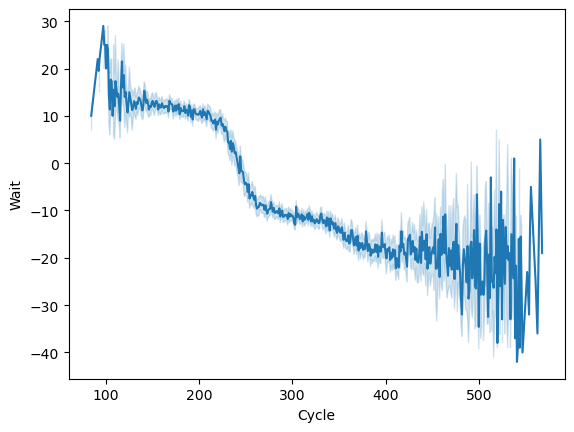

In [61]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

x_col = 'Cycle'
y_col = 'Wait'
sns.lineplot(store,x=x_col,y=y_col)

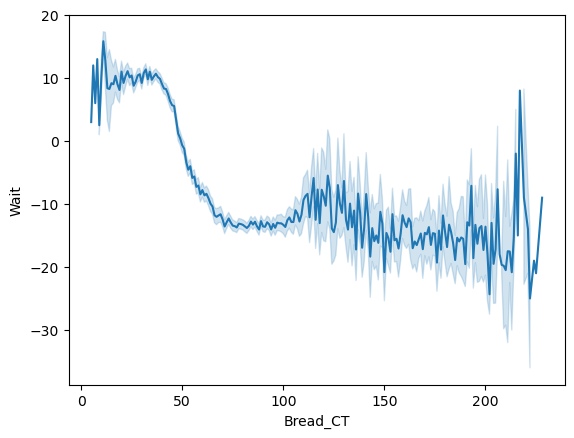

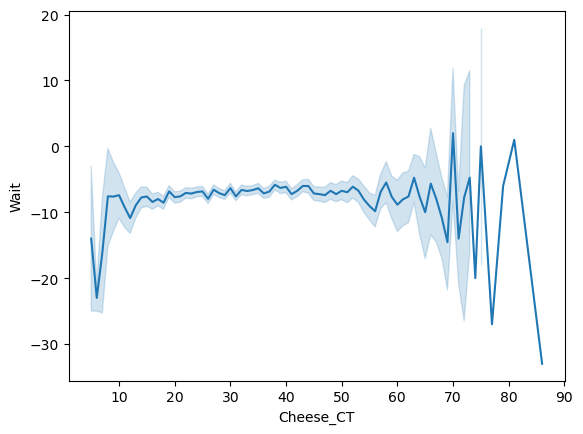

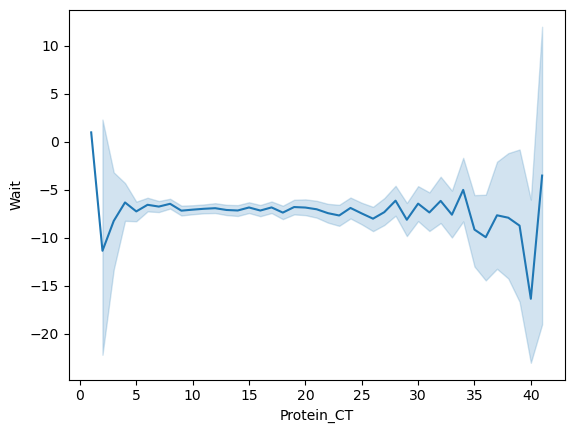

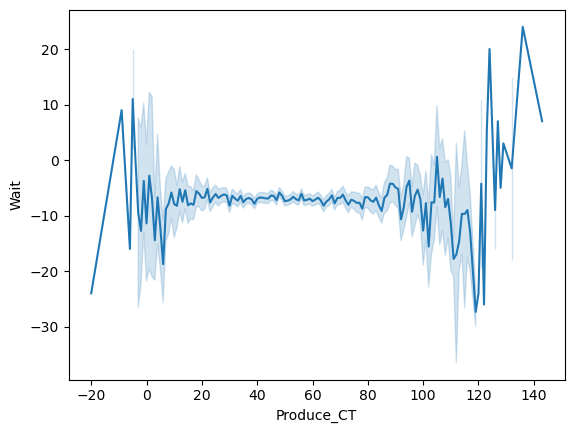

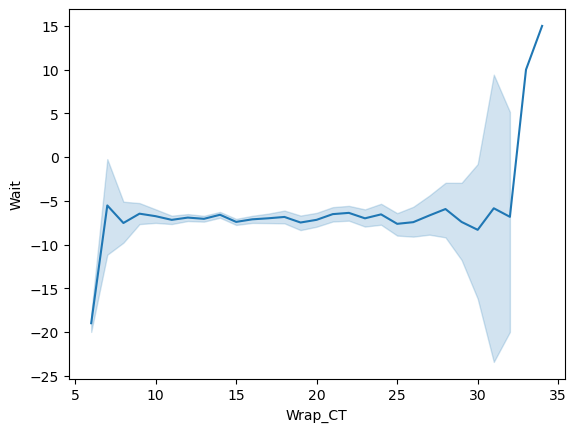

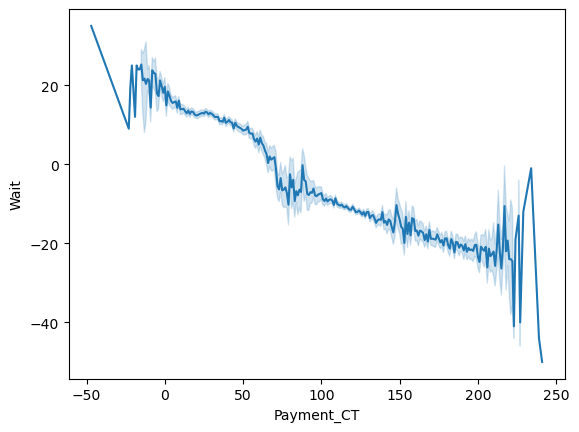

In [62]:
#Ask them to output all 6 different various cycle time results vs. Wait

import seaborn as sns
tests = store.columns[4:10]

for i in tests:
    x_col = i
    y_col = 'Wait'
    plt.figure(i)
    sns.lineplot(store,x=x_col,y=y_col)